In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
customer=pd.read_csv('Telco-Customer-Churn.csv')

In [ ]:
customer.info()

In [ ]:
#a. Find the total number of male customers 

sum(customer['gender']=="Male")

In [ ]:
#b. Find the total number of customers whose Internet Service is ‘DSL’
sum(customer['InternetService']=="DSL")


In [4]:
#c. Extract all the Female senior citizens whose Payment Method is Mailed check & store the result in ‘new_customer’
new_customer=customer[(customer['gender']=='Female') & 
(customer['SeniorCitizen']==1) & (customer['PaymentMethod']=='Mailed check')] 
new_customer.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
139,0390-DCFDQ,Female,1,Yes,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,Yes
176,2656-FMOKZ,Female,1,No,No,15,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.45,1145.7,Yes
267,3197-ARFOY,Female,1,No,No,19,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,105.00,2007.25,No
451,5760-WRAHC,Female,1,No,No,22,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,69.75,1545.4,No
470,4933-IKULF,Female,1,No,No,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,330.6,No


In [5]:
from sklearn.preprocessing import LabelEncoder
l1=LabelEncoder()
# assigning labels to the data
labelEncoder =LabelEncoder()
for col in customer.columns:
    customer[col] = labelEncoder.fit_transform(customer[col])

In [6]:
#d. Extract all those customers whose tenure is less than 10 months or their Total charges is less than 500$ & store the result in ‘new_customer’
new_customer=customer[(customer['tenure']<10) | (customer['TotalCharges']<500)] 

new_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,142,2505,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,436,157,1
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,729,925,1
5,6551,0,0,0,0,8,1,2,1,0,...,2,0,2,2,0,1,2,1274,6104,1
16,5820,0,0,0,0,52,1,0,2,1,...,1,1,1,1,1,0,3,42,46,0


# B) Data Visualization: 



In [7]:
#a. Build a pie-chart to show the distribution of customers would be churning out
names = customer["Churn"].value_counts().keys().tolist() 
sizes= customer["Churn"].value_counts().tolist()

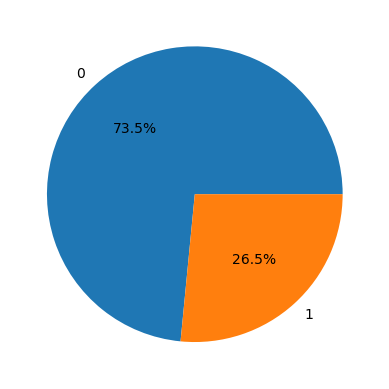

In [8]:
plt.pie(sizes,labels=names,autopct="%0.1f%%") 
plt.show()

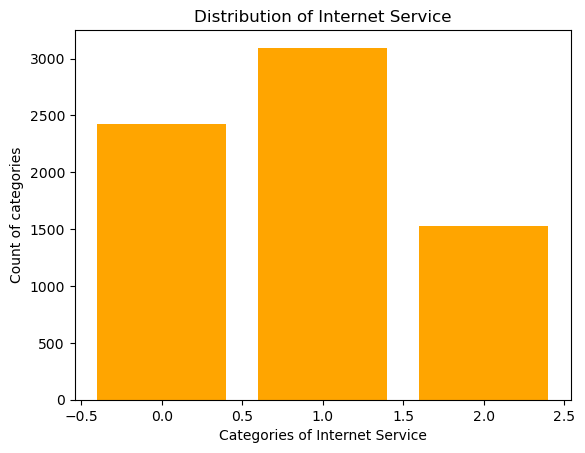

In [9]:
# b. Build a bar-plot to show the distribution of ‘Internet  Service’
plt.bar(customer['InternetService'].value_counts().keys().tolist(),
        customer['InternetService'].value_counts().tolist(),color='orange')
plt.xlabel('Categories of Internet Service') 
plt.ylabel('Count of categories')
plt.title('Distribution of Internet Service') 
plt.show()

# C) Model Building: 



In [10]:
# a. Build a sequential model using Keras, to find out if the customerwouldchurn or not, using 
#‘tenure’ as the feature and ‘Churn’ as the dependent/target column:

In [11]:
# i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function.
x=customer[['tenure']] 
y=customer[['Churn']]
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [12]:
#ii. This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function

from keras.models import Sequential 
from keras.layers import Dense 
model = Sequential() 
model.add(Dense(12, input_dim=1, activation='relu')) 
model.add(Dense(8, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))

In [34]:
# iii. Use ‘Adam’ as the optimization algorithm 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
import tensorflow.keras as keras
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

model.fit(x_train, y_train, epochs=150,validation_data=(x_test,y_test)) 
y_pred = np.argmax (model.predict (x_test), axis=-1)
 
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_test,y_pred) 


Epoch 1/150
155/155 [==============================] - 2s 5ms/step - loss: 0.5921 - accuracy: 0.7515 - val_loss: 0.4886 - val_accuracy: 0.7785
Epoch 2/150
155/155 [==============================] - 1s 4ms/step - loss: 0.6156 - accuracy: 0.7343 - val_loss: 0.7455 - val_accuracy: 0.7425
Epoch 3/150
155/155 [==============================] - 1s 4ms/step - loss: 0.5564 - accuracy: 0.7517 - val_loss: 0.5387 - val_accuracy: 0.7402
Epoch 4/150
155/155 [==============================] - 1s 4ms/step - loss: 0.5232 - accuracy: 0.7566 - val_loss: 0.8122 - val_accuracy: 0.7317
Epoch 5/150
155/155 [==============================] - 1s 4ms/step - loss: 0.5982 - accuracy: 0.7495 - val_loss: 0.4955 - val_accuracy: 0.7525
Epoch 6/150
155/155 [==============================] - 1s 4ms/step - loss: 0.5071 - accuracy: 0.7582 - val_loss: 2.0023 - val_accuracy: 0.4009
Epoch 7/150
155/155 [==============================] - 1s 4ms/step - loss: 0.6705 - accuracy: 0.7323 - val_loss: 0.4527 - val_accuracy: 0.7695

Epoch 58/150
155/155 [==============================] - 1s 5ms/step - loss: 0.5057 - accuracy: 0.7639 - val_loss: 0.7616 - val_accuracy: 0.6228
Epoch 59/150
155/155 [==============================] - 1s 4ms/step - loss: 0.5338 - accuracy: 0.7471 - val_loss: 0.5405 - val_accuracy: 0.7246
Epoch 60/150
155/155 [==============================] - 1s 4ms/step - loss: 0.5515 - accuracy: 0.7523 - val_loss: 0.5165 - val_accuracy: 0.7425
Epoch 61/150
155/155 [==============================] - 1s 4ms/step - loss: 0.5381 - accuracy: 0.7493 - val_loss: 0.5649 - val_accuracy: 0.7430
Epoch 62/150
155/155 [==============================] - 1s 4ms/step - loss: 0.5051 - accuracy: 0.7604 - val_loss: 0.6465 - val_accuracy: 0.6574
Epoch 63/150
155/155 [==============================] - 1s 4ms/step - loss: 0.4963 - accuracy: 0.7639 - val_loss: 0.5719 - val_accuracy: 0.7369
Epoch 64/150
155/155 [==============================] - 1s 4ms/step - loss: 0.5401 - accuracy: 0.7467 - val_loss: 0.6128 - val_accuracy:

Epoch 115/150
155/155 [==============================] - 1s 4ms/step - loss: 0.5014 - accuracy: 0.7663 - val_loss: 0.4497 - val_accuracy: 0.7757
Epoch 116/150
155/155 [==============================] - 1s 4ms/step - loss: 0.5370 - accuracy: 0.7436 - val_loss: 0.4741 - val_accuracy: 0.7596
Epoch 117/150
155/155 [==============================] - 1s 4ms/step - loss: 0.4885 - accuracy: 0.7631 - val_loss: 0.4618 - val_accuracy: 0.7695
Epoch 118/150
155/155 [==============================] - 1s 4ms/step - loss: 0.4912 - accuracy: 0.7698 - val_loss: 0.7274 - val_accuracy: 0.7473
Epoch 119/150
155/155 [==============================] - 1s 4ms/step - loss: 0.4986 - accuracy: 0.7594 - val_loss: 0.4520 - val_accuracy: 0.7785
Epoch 120/150
155/155 [==============================] - 1s 4ms/step - loss: 0.4861 - accuracy: 0.7631 - val_loss: 0.6969 - val_accuracy: 0.7440
Epoch 121/150
155/155 [==============================] - 1s 4ms/step - loss: 0.5231 - accuracy: 0.7521 - val_loss: 0.6992 - val_ac

array([[1539,    0],
       [ 574,    0]], dtype=int64)

In [ ]:
from matplotlib import pyplot as plt 
plt.plot(model.history.history['accuracy']) 
plt.plot(model.history.history['val_accuracy']) 
plt.show()

In [41]:

np.mean(model.history.history['val_accuracy']) 

In [ ]:
//////////////////////////////////////////////////////////////////////////////////

In [ ]:
b. Build the 2nd model using same target and feature variables: 
i. Add a drop-out layer after the input layer with drop-out value of 0.3 
ii. Add a drop-out layer after the hidden layer with drop-out value of 0.2 
iii. Predict the values on the test set and build a confusion matrix 
iv. Plot the ‘Accuracy vs Epochs’ grap

# b. Build the 2nd model using same target and feature variables: 

In [19]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [20]:

model = Sequential() 
model.add(Dense(12, input_dim=1, activation='relu')) 
model.add(Dropout(0.3)) 
model.add(Dense(8, activation='relu')) 
model.add(Dropout(0.2)) 
model.add(Dense(1, activation='sigmoid'))

In [21]:
#model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.fit(x_train, y_train, epochs=150,validation_data=(x_test,y_test)) 
y_pred = model.predict_classes(x_test) 
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_test,y_pred) 


Epoch 1/150
155/155 [==============================] - 2s 7ms/step - loss: 0.6627 - accuracy: 0.6619 - val_loss: 0.5379 - val_accuracy: 0.7283
Epoch 2/150
155/155 [==============================] - 1s 5ms/step - loss: 0.5504 - accuracy: 0.7355 - val_loss: 0.5380 - val_accuracy: 0.7283
Epoch 3/150
155/155 [==============================] - 1s 5ms/step - loss: 0.5315 - accuracy: 0.7367 - val_loss: 0.5328 - val_accuracy: 0.7283
Epoch 4/150
155/155 [==============================] - 1s 5ms/step - loss: 0.5298 - accuracy: 0.7367 - val_loss: 0.5316 - val_accuracy: 0.7283
Epoch 5/150
155/155 [==============================] - 1s 5ms/step - loss: 0.5254 - accuracy: 0.7373 - val_loss: 0.5332 - val_accuracy: 0.7283
Epoch 6/150
155/155 [==============================] - 1s 5ms/step - loss: 0.5251 - accuracy: 0.7373 - val_loss: 0.5272 - val_accuracy: 0.7283
Epoch 7/150
155/155 [==============================] - 1s 5ms/step - loss: 0.5218 - accuracy: 0.7373 - val_loss: 0.5383 - val_accuracy: 0.7283

Epoch 58/150
155/155 [==============================] - 1s 5ms/step - loss: 0.5193 - accuracy: 0.7373 - val_loss: 0.5186 - val_accuracy: 0.7283
Epoch 59/150
155/155 [==============================] - 1s 5ms/step - loss: 0.5195 - accuracy: 0.7373 - val_loss: 0.5221 - val_accuracy: 0.7283
Epoch 60/150
155/155 [==============================] - 1s 4ms/step - loss: 0.5223 - accuracy: 0.7373 - val_loss: 0.5272 - val_accuracy: 0.7283
Epoch 61/150
155/155 [==============================] - 1s 5ms/step - loss: 0.5221 - accuracy: 0.7373 - val_loss: 0.5243 - val_accuracy: 0.7283
Epoch 62/150
155/155 [==============================] - 1s 4ms/step - loss: 0.5198 - accuracy: 0.7373 - val_loss: 0.5209 - val_accuracy: 0.7283
Epoch 63/150
155/155 [==============================] - 1s 5ms/step - loss: 0.5188 - accuracy: 0.7373 - val_loss: 0.5252 - val_accuracy: 0.7283
Epoch 64/150
155/155 [==============================] - 1s 4ms/step - loss: 0.5194 - accuracy: 0.7373 - val_loss: 0.5215 - val_accuracy:

Epoch 115/150
155/155 [==============================] - 1s 5ms/step - loss: 0.5240 - accuracy: 0.7373 - val_loss: 0.5251 - val_accuracy: 0.7283
Epoch 116/150
155/155 [==============================] - 1s 5ms/step - loss: 0.5212 - accuracy: 0.7373 - val_loss: 0.5164 - val_accuracy: 0.7283
Epoch 117/150
155/155 [==============================] - 1s 5ms/step - loss: 0.5184 - accuracy: 0.7373 - val_loss: 0.5193 - val_accuracy: 0.7283
Epoch 118/150
155/155 [==============================] - 1s 5ms/step - loss: 0.5193 - accuracy: 0.7373 - val_loss: 0.5347 - val_accuracy: 0.7283
Epoch 119/150
155/155 [==============================] - 1s 5ms/step - loss: 0.5202 - accuracy: 0.7373 - val_loss: 0.5258 - val_accuracy: 0.7283
Epoch 120/150
155/155 [==============================] - 1s 5ms/step - loss: 0.5213 - accuracy: 0.7373 - val_loss: 0.5279 - val_accuracy: 0.7283
Epoch 121/150
155/155 [==============================] - 1s 5ms/step - loss: 0.5227 - accuracy: 0.7373 - val_loss: 0.5142 - val_ac

AttributeError: 'Sequential' object has no attribute 'predict_classes'

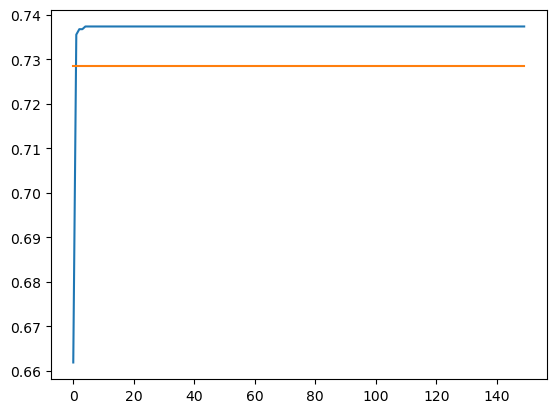

In [24]:
from matplotlib import pyplot as plt 
plt.plot(model.history.history['accuracy']) 
plt.plot(model.history.history['val_accuracy']) 
plt.show()

In [25]:
np.mean(model.history.history['val_accuracy']) 

0.7283483147621155


# c. Build the 3rd model using ‘Tenure’, ’Monthly Charges’ & ‘Total Charges’ as the features and ‘Churn’ as the dependent/target column: 

i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function.

ii. This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function

iii. Use ‘Adam’ as the optimization algorithm

iv. Fit the model on the train set, with number of epochs to be 150 

v. Predict the values on the test set and

vi. Plot the ‘Accuracy vs Epochs’ graph

In [26]:
x=customer[['MonthlyCharges','tenure','TotalCharges']]#Features 
y=customer[['Churn']]#Target

In [27]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42) 
model = Sequential() 
model.add(Dense(12, input_dim=3, activation='relu')) 
model.add(Dense(8, activation='relu')) 
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
model.fit(x_train, y_train, epochs=150,validation_data=(x_test,y_test)) 
y_pred = model.predict_classes(x_test) 


Epoch 1/150
155/155 [==============================] - 2s 6ms/step - loss: 5.7145 - accuracy: 0.6793 - val_loss: 1.8506 - val_accuracy: 0.7383
Epoch 2/150
155/155 [==============================] - 1s 5ms/step - loss: 1.1644 - accuracy: 0.7162 - val_loss: 0.6227 - val_accuracy: 0.7681
Epoch 3/150
155/155 [==============================] - 1s 4ms/step - loss: 0.7571 - accuracy: 0.7203 - val_loss: 0.7244 - val_accuracy: 0.6436
Epoch 4/150
155/155 [==============================] - 1s 5ms/step - loss: 0.6247 - accuracy: 0.7469 - val_loss: 0.4892 - val_accuracy: 0.7785
Epoch 5/150
155/155 [==============================] - 1s 5ms/step - loss: 0.6026 - accuracy: 0.7444 - val_loss: 0.5650 - val_accuracy: 0.7501
Epoch 6/150
155/155 [==============================] - 1s 4ms/step - loss: 0.6035 - accuracy: 0.7489 - val_loss: 0.8319 - val_accuracy: 0.7411
Epoch 7/150
155/155 [==============================] - 1s 4ms/step - loss: 1.0195 - accuracy: 0.7144 - val_loss: 1.5624 - val_accuracy: 0.5140

Epoch 58/150
155/155 [==============================] - 1s 4ms/step - loss: 0.7482 - accuracy: 0.7314 - val_loss: 1.4087 - val_accuracy: 0.5272
Epoch 59/150
155/155 [==============================] - 1s 5ms/step - loss: 0.6447 - accuracy: 0.7335 - val_loss: 0.6868 - val_accuracy: 0.7089
Epoch 60/150
155/155 [==============================] - 1s 5ms/step - loss: 0.5774 - accuracy: 0.7440 - val_loss: 1.1318 - val_accuracy: 0.7345
Epoch 61/150
155/155 [==============================] - 1s 4ms/step - loss: 0.8004 - accuracy: 0.7398 - val_loss: 0.4646 - val_accuracy: 0.7785
Epoch 62/150
155/155 [==============================] - 1s 4ms/step - loss: 0.5678 - accuracy: 0.7548 - val_loss: 0.9288 - val_accuracy: 0.7302
Epoch 63/150
155/155 [==============================] - 1s 4ms/step - loss: 0.7346 - accuracy: 0.7227 - val_loss: 1.5104 - val_accuracy: 0.4931
Epoch 64/150
155/155 [==============================] - 1s 5ms/step - loss: 0.6267 - accuracy: 0.7373 - val_loss: 0.9581 - val_accuracy:

Epoch 115/150
155/155 [==============================] - 1s 5ms/step - loss: 0.5952 - accuracy: 0.7444 - val_loss: 0.6397 - val_accuracy: 0.7354
Epoch 116/150
155/155 [==============================] - 1s 4ms/step - loss: 0.6016 - accuracy: 0.7426 - val_loss: 2.5498 - val_accuracy: 0.3852
Epoch 117/150
155/155 [==============================] - 1s 4ms/step - loss: 0.8397 - accuracy: 0.7199 - val_loss: 0.7317 - val_accuracy: 0.6488
Epoch 118/150
155/155 [==============================] - 1s 4ms/step - loss: 0.5625 - accuracy: 0.7515 - val_loss: 0.5370 - val_accuracy: 0.7440
Epoch 119/150
155/155 [==============================] - 1s 4ms/step - loss: 0.6670 - accuracy: 0.7323 - val_loss: 0.5203 - val_accuracy: 0.7719
Epoch 120/150
155/155 [==============================] - 1s 4ms/step - loss: 0.6031 - accuracy: 0.7446 - val_loss: 0.5136 - val_accuracy: 0.7738
Epoch 121/150
155/155 [==============================] - 1s 4ms/step - loss: 0.6101 - accuracy: 0.7367 - val_loss: 0.6773 - val_ac

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [29]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_test,y_pred) 

array([[1539,    0],
       [ 574,    0]], dtype=int64)

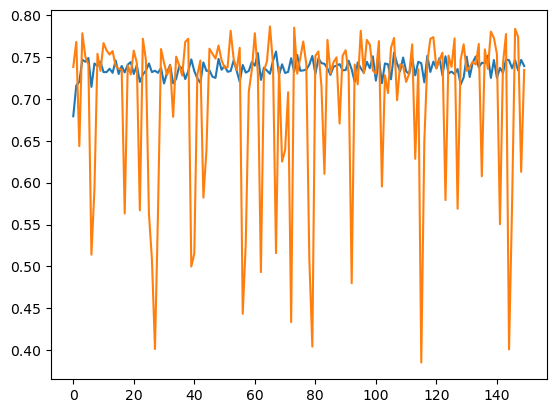

In [32]:
from matplotlib import pyplot as plt 
plt.plot(model.history.history['accuracy']) 
plt.plot(model.history.history['val_accuracy']) 
plt.show()

In [33]:
import numpy as np 
np.mean(model.history.history['val_accuracy'])

0.699504654208819